In [1]:
from keras import backend as K
from keras.layers import Activation
from keras.layers import Input, Lambda, Dense, Dropout, Convolution2D, MaxPooling2D, Flatten,Conv2D
from keras.models import Sequential, Model
from keras.optimizers import RMSprop,Adam
from keras.regularizers import l2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.keras.callbacks import TensorBoard


Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import keras.losses
import keras.metrics


In [3]:
# make data 
n_sample = 1000

X = np.random.randn(n_sample)
y = 2*X + 5 + np.random.randn(n_sample)

In [4]:
# make train , test data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25)

print(x_train.shape)

(750,)


In [3]:
# build model 
def build_model():
    model = Sequential()
    model.add(Dense(1,input_shape=(1,),kernel_regularizer=l2(1e-4)))
    return model

In [4]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
import time
from tensorflow.keras.losses import mean_squared_error
tensorboard = TensorBoard(log_dir="graph/linear/")
rms = RMSprop(0.05)
model.compile(loss=mean_squared_error
              , optimizer=rms
             ,metrics=[])

In [6]:
his = model.fit(x_train,y_train,epochs=200,validation_split=0.25,batch_size=32
               ,callbacks=[tensorboard,EarlyStopping(monitor='val_loss',patience=50)])

NameError: name 'x_train' is not defined

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

def plot_loss(his,save_to_file):

    loss  = np.array(his.history["loss"])
    val_loss = np.array(his.history["val_loss"])
    n  = len(loss)

    # data = np.zeros(2*n)
    # data[::2] = loss
    # data[1::2] = val_loss

    idx = np.arange(n)
    # iters = np.zeros(2*n)
    # iters[::2] = idx
    # iters[1::2] = idx

    fig = plt.figure()
    ax = plt.axes(xlim=(0,n), ylim=(loss.min()-0.01,loss.max()+0.01))   
    # line1, = ax.plot([], [],"r-", lw=2)
    # line2, = ax.plot([], [],"b-", lw=2)
    color = ["r","b"]
    label = ["loss","val_loss"]
    lines = [ax.plot([], [],color[i],label=label[i],lw=2)[0] for i in range(2)]

    # initialization function: plot the background of each frame
    def init():
        lines[0].set_data([], [])
        lines[1].set_data([], [])
        return lines

    # animation function.  This is called sequentially
    def animate(i):
        x = idx[:i]
        y = loss[:i]
        lines[0].set_data(x, y)
        x = idx[:i]
        y = val_loss[:i]
        lines[1].set_data(x, y)
        return lines

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=n, interval=20, blit=True)
    
    ax.set_xlabel("iters")
    ax.set_ylabel("loss")
    plt.legend()
#     plt.legend()
    anim.save(save_to_file, fps=15, extra_args=['-vcodec', 'libx264'])
    plt.show()

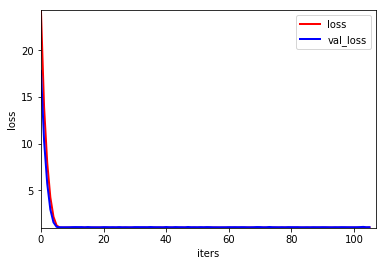

In [11]:
plot_loss(his,"training_loss_linear.mp4")

In [18]:
model.evaluate(x_test[:5],y_test[:5])

5/5 [==============================] - 0s 200us/step


[1.1522915363311768, 0.0]

In [13]:
model.get_weights()

[array([[1.9842569]], dtype=float32), array([4.8752403], dtype=float32)]

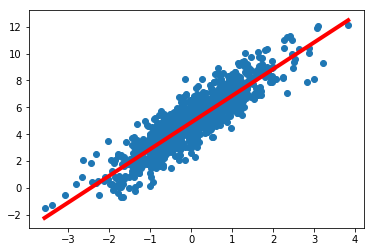

In [12]:
# plot HyperLane
ax = plt.gca()

xlim = [X.min(),X.max()]
xx = np.linspace(xlim[0], xlim[1], 30)
yy = model.predict(xx)

ax.scatter(X,y)
ax.plot(xx,yy,"r-",lw=4)